# Explore here

It's recommended to use this notebook for exploration purposes.

In [24]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
load_dotenv()

import requests
import time

url = " https://es.wikipedia.org/wiki/Leucocito"
html_data = requests.get(url, time.sleep(10)).text

# If not information is extracted, then connect as anonymous
if "403 Forbidden" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = request.text

html_data


'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Leucocito - Wikipedia, la enciclopedia libre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-fea

In [25]:
    soup = BeautifulSoup(html_data, 'html')
    soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Leucocito - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature

In [33]:
tables = soup.find_all("table", class_="wikitable")
tables

[<table class="wikitable">
 <tbody><tr>
 <th>Tipo</th>
 <th>Apariencia microscópica</th>
 <th>Diagrama</th>
 <th>Porcentaje aproximado en adultos</th>
 <th>Diámetro (μm)</th>
 <th><sup class="reference separada" id="cite_ref-isbn0-443-01657-7_7-0"><a href="#cite_note-isbn0-443-01657-7-7"><span class="corchete-llamada">[</span>7<span class="corchete-llamada">]</span></a></sup>​ Principal objetivo</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-1"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Núcleo</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-2"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Gránulos</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-3"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada"

In [45]:

leucocitos_tipos = pd.DataFrame(columns = ["Tipo", "Porcentaje"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Tipo = col[0].text
        Porcentaje = col[3]
        leucocitos_tipos = pd.concat([leucocitos_tipos, pd.DataFrame({
            "Tipo": Tipo,
            "Porcentaje": Porcentaje
        }, index = [0])], ignore_index = True)

leucocitos_tipos.head()

,Tipo,Porcentaje
0,Neutrófilo,62%
1,Eosinófilo,2.3%
2,Basófilo,0.4%
3,Linfocito,30%
4,Monocito,5.3%


In [50]:
import sqlite3

connection = sqlite3.connect("Leucocitos.db")
connection

cursor = connection.cursor()
cursor.execute("""CREATE TABLE leucocitos (Tipo, Porcentaje)""")

leuco_tuples = list(leucocitos_tipos.to_records(index = False))
leuco_tuples[:5]

cursor.executemany("INSERT INTO leucocitos VALUES (?,?)", leuco_tuples)
connection.commit()

for row in cursor.execute("SELECT * FROM leucocitos"):
    print(row)

('Neutrófilo', '62%')
('Eosinófilo', '2.3%')
('Basófilo', '0.4%')
('Linfocito', '30%')
('Monocito', '5.3%')


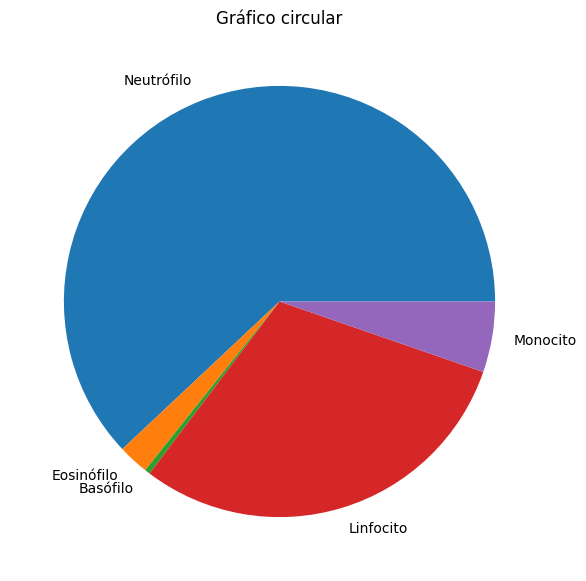

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ["Neutrófilo", "Eosinófilo", "Basófilo", "Linfocito", "Monocito"]
lt = leucocitos_tipos.Porcentaje
ltp =list(lt.str.replace("%",""))
sizes =[ltp[0], ltp[1], ltp[2],ltp[3],ltp[4]]
plt.figure(figsize = (7,7))

plt.pie(sizes, labels = labels)

plt.title("Gráfico circular")
plt.show()
